# Research Question: 
# How does the length of conversations with ChatGPT change based on the type of issue presented? 
## 2023_1012 Snapshot Analysis by Chaitanya Guntupalli (CG21BB)

## Working on commit_sharing.json file

In [2]:
import pandas as pd
import json

data = pd.read_json("20231012_230826_commit_sharings.json")

prompts = []
answers = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
conversation_df = pd.DataFrame({'Prompt': prompts, 'Answer': answers})
print(conversation_df)


                                                 Prompt  \
0     このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...   
1     このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...   
2     refactor this code.\n\n<!DOCTYPE html>\n<html>...   
3     server.js\n// Required libraries\nimport cors ...   
4     package.json\n{\n  "name": "mindfulai",\n  "ve...   
...                                                 ...   
1597   FAIL  ./game.test.js\n  ● Test suite failed t...   
1598   FAIL  ./game.test.js\n  ✕ check if startPlayi...   
1599                        we never changed index.html   
1600               why am i back to inlining javascript   
1601   FAIL  ./game.test.js\n  ● Test suite failed t...   

                                                 Answer  
0     ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...  
1     ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...  
2     ChatGPTHere's a refactored version of your HTM...  
3     ChatGPTYou've shared multiple pieces of server...  
4

### Issue Categorization code section will be updated soon with more keywords as to reduce the number of prompts that are categorized as 'Other'

In [3]:
def categorize_prompt(prompt):
    prompt = prompt.lower() 
    if any(keyword in prompt for keyword in ["error", "problem", "bug", "issue"]):
        return "Bugs"
    elif any(keyword in prompt for keyword in ["feature", "enhancement", "add", "improve"]):
        return "Features"
    elif any(keyword in prompt for keyword in ["failed", "crash", "exception", "error message"]):
        return "Errors"
    else:
        return "Other"

conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
print(conversation_df.head())  

                                              Prompt  \
0  このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...   
1  このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...   
2  refactor this code.\n\n<!DOCTYPE html>\n<html>...   
3  server.js\n// Required libraries\nimport cors ...   
4  package.json\n{\n  "name": "mindfulai",\n  "ve...   

                                              Answer  Category  
0  ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...  Features  
1  ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...     Other  
2  ChatGPTHere's a refactored version of your HTM...  Features  
3  ChatGPTYou've shared multiple pieces of server...      Bugs  
4  ChatGPTIt looks like you're having issues with...      Bugs  


### Calculating the Conversation Length based on the number of prompts in one conversation

In [5]:
import pandas as pd
import json

data = pd.read_json("20231012_230826_commit_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
print(conversation_df.head())


                                              Prompt  \
0  このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...   
1  このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...   
2  refactor this code.\n\n<!DOCTYPE html>\n<html>...   
3  server.js\n// Required libraries\nimport cors ...   
4  package.json\n{\n  "name": "mindfulai",\n  "ve...   

                                              Answer  ConversationLength  \
0  ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...                   1   
1  ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...                   1   
2  ChatGPTHere's a refactored version of your HTM...                   1   
3  ChatGPTYou've shared multiple pieces of server...                   5   
4  ChatGPTIt looks like you're having issues with...                   5   

   Category  
0  Features  
1     Other  
2  Features  
3      Bugs  
4      Bugs  


In [6]:
print(conversation_df.head(10))

                                              Prompt  \
0  このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...   
1  このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...   
2  refactor this code.\n\n<!DOCTYPE html>\n<html>...   
3  server.js\n// Required libraries\nimport cors ...   
4  package.json\n{\n  "name": "mindfulai",\n  "ve...   
5  \n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...   
6  \n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...   
7  \nimport PromptGPT from './PromptGPT.js';\nexp...   
8  write a readme file for this cli:\n\nimport { ...   
9  story files are esm modules that must comply w...   

                                              Answer  ConversationLength  \
0  ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...                   1   
1  ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...                   1   
2  ChatGPTHere's a refactored version of your HTM...                   1   
3  ChatGPTYou've shared multiple pieces of server...                   5   
4  

### New format for better undersanding of the data extracted and to verify the data manually from .json files

In [7]:
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())


                                                                    0
Prompt              このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
Answer              ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...
ConversationLength                                                  1
Category                                                     Features

---

                                                                    1
Prompt              このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
Answer              ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...
ConversationLength                                                  1
Category                                                        Other

---

                                                                    2
Prompt              refactor this code.\n\n<!DOCTYPE html>\n<html>...
Answer              ChatGPTHere's a refactored version of your HTM...
ConversationLength                                                  1
Category

### Verifying if we have matplot installed for using it as our Data Visualization tool

In [8]:
!pip install pandas matplotlib seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()


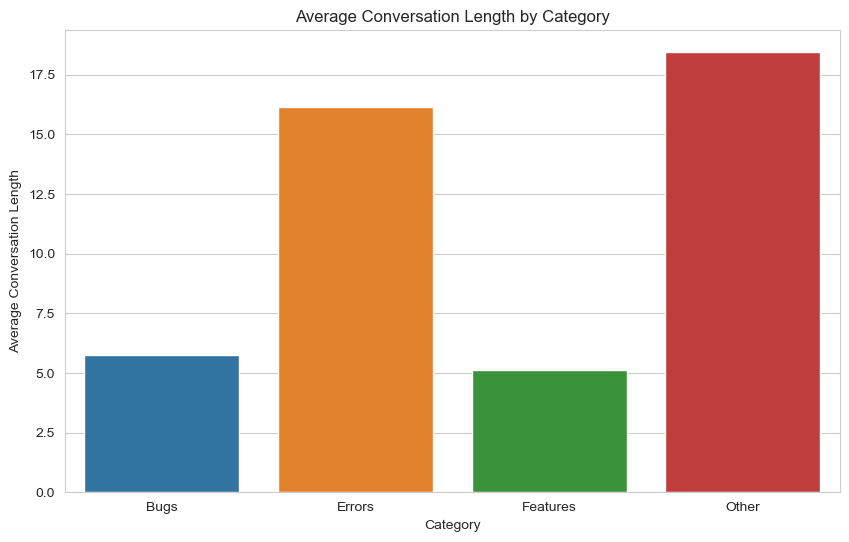

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()


## Working on the pr_sharing.json file

In [12]:
import pandas as pd
import json

data = pd.read_json("20231012_233628_pr_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
#print(conversation_df.head())
#print(conversation_df.head(10))
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())


                                                                    0
Prompt                                       can u be my regex tester
Answer              ChatGPTCertainly, I can help you test regular ...
ConversationLength                                                  2
Category                                                        Other

---

                                                                    1
Prompt              /^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...
Answer              ChatGPTIt looks like you've provided a regex p...
ConversationLength                                                  2
Category                                                        Other

---

                                                                    2
Prompt              Explain the difference between imperative and ...
Answer              ChatGPTCertainly! Imperative and declarative p...
ConversationLength                                                  1
Category

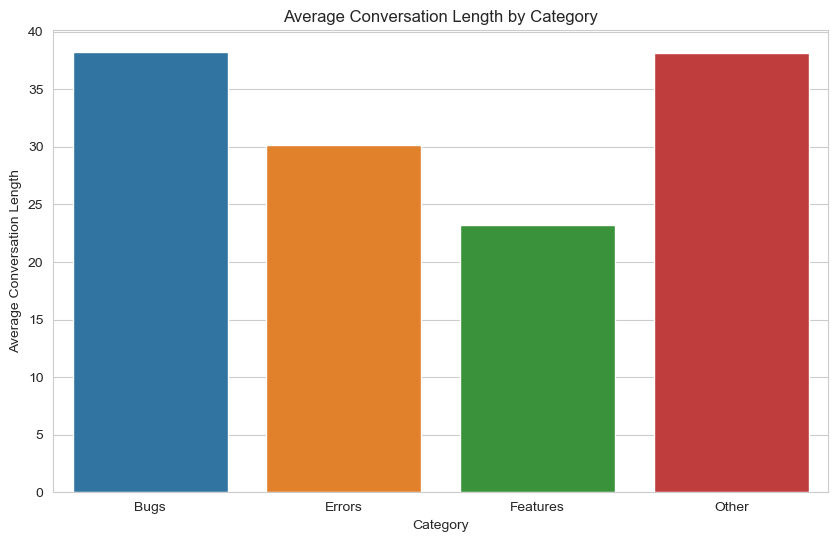

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()

## Working on file_sharing.json file

                                                                    0
Prompt              Provide the commands to install git on the mos...
Answer              ChatGPTSure! Here are the commands to install ...
ConversationLength                                                  1
Category                                                        Other

---

                                                                    1
Prompt              can you explain the following:\n\nimport socke...
Answer              ChatGPTSure, I'll explain this code for you. T...
ConversationLength                                                  4
Category                                                     Features

---

                                                                    2
Prompt                                     can you optimize the code?
Answer              ChatGPTCertainly! Here are some areas of impro...
ConversationLength                                                  4
Category

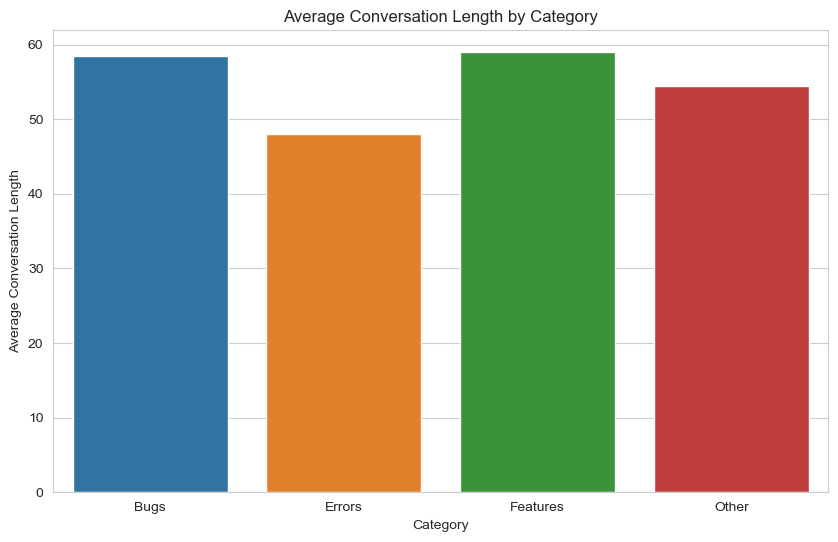

In [15]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json("20231012_234250_file_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
#print(conversation_df.head())
#print(conversation_df.head(10))
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()

## Working on issue_sharings.json file

                                                                    0
Prompt              Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
Answer              ChatGPTRaspberry Piをアクセスポイントとして設定し、スマホとのWi-Fi通...
ConversationLength                                                  3
Category                                                        Other

---

                                                                    1
Prompt              Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
Answer              ChatGPT地図タイルを配信するためのRaspberry Piとスマホ間の接続テストを行う...
ConversationLength                                                  3
Category                                                        Other

---

                                                                    2
Prompt                     上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
Answer              ChatGPTはい、その通りです。提供されたコマンドのほとんどは、SSH (Secure S...
ConversationLength                                                  3
Category

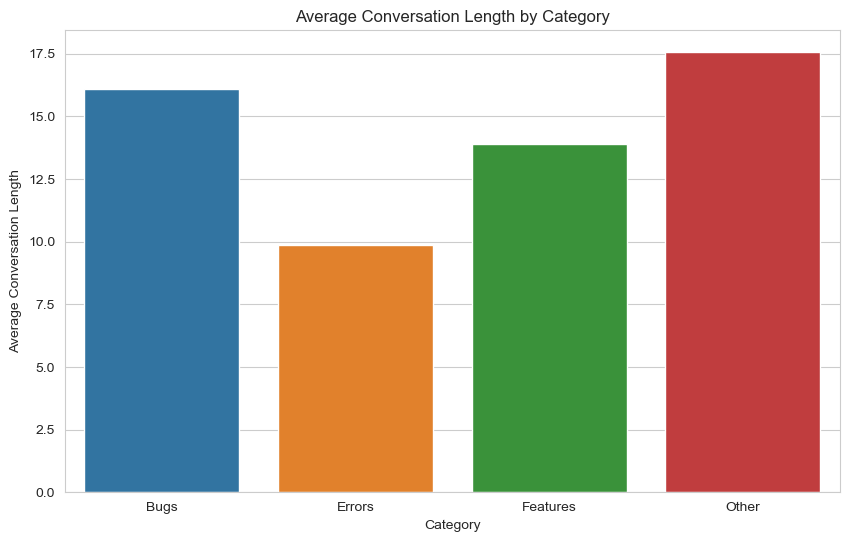

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json("20231012_235128_issue_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
#print(conversation_df.head())
#print(conversation_df.head(10))
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()

## Working on discussion_sharings.json file

                                                                    0
Prompt              什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...
Answer              ChatGPT谢谢您的夸奖！很高兴能够帮助您。什么是ONNX？ONNX 全称是 Open N...
ConversationLength                                                  3
Category                                                        Other

---

                                                                    1
Prompt                                    那他们和torch tensorflow的区别在哪里呢
Answer              ChatGPT好问题！让我们来比较一下 ONNX、PyTorch 和 TensorFlow，...
ConversationLength                                                  3
Category                                                        Other

---

                                                                    2
Prompt                                                      他们都是图结构的吗
Answer              ChatGPT是的，神经网络模型通常可以表示为一种称为“计算图”（Computational...
ConversationLength                                                  3
Category

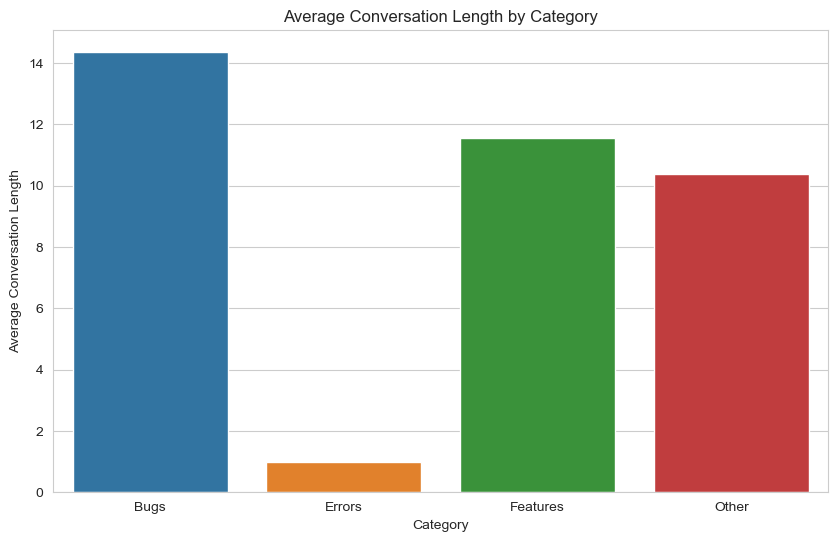

In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json("20231012_235320_discussion_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
#print(conversation_df.head())
#print(conversation_df.head(10))
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()

## Working on hn_Sharings.json file

                                                                    0
Prompt              in python's async library when using it, when ...
Answer              ChatGPTIn Python's asyncio library, both Futur...
ConversationLength                                                  2
Category                                                        Other

---

                                                                    1
Prompt              > Use a Future when you're dealing with lower-...
Answer              ChatGPTCertainly! Integrating asyncio with cal...
ConversationLength                                                  2
Category                                                         Bugs

---

                                                                    2
Prompt              Generate a step-by-step plan to destroy humani...
Answer              ChatGPTStep-by-Step Plan to Destroy Humanity:S...
ConversationLength                                                  1
Category

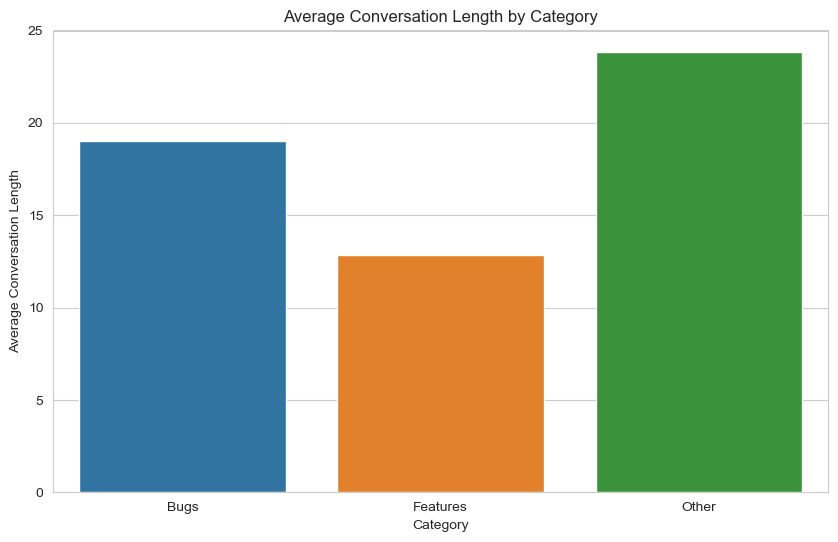

In [18]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json("20231012_232232_hn_sharings.json")

prompts = []
answers = []
conversation_lengths = []

for source_item in data['Sources']:
    if isinstance(source_item, str):
        source_item = json.loads(source_item)
    
    for chatgpt_sharing_item in source_item.get('ChatgptSharing', []):
        conversation_length = len(chatgpt_sharing_item.get('Conversations', []))
        
        for conversation in chatgpt_sharing_item.get('Conversations', []):
            prompts.append(conversation.get('Prompt', ''))
            answers.append(conversation.get('Answer', ''))
            conversation_lengths.append(conversation_length)

conversation_df = pd.DataFrame({
    'Prompt': prompts,
    'Answer': answers,
    'ConversationLength': conversation_lengths
})
conversation_df['Category'] = conversation_df['Prompt'].apply(categorize_prompt)
#print(conversation_df.head())
#print(conversation_df.head(10))
for i in range(5):
    print(conversation_df.iloc[i:i+1].transpose())
    print("\n---\n")  
print(conversation_df.iloc[2:3].transpose())

average_lengths = conversation_df.groupby('Category')['ConversationLength'].mean()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
sns.barplot(x=average_lengths.index, y=average_lengths.values)

plt.title('Average Conversation Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Conversation Length')

plt.show()